In [12]:
# Import the requests library.
import requests
import json
import numpy as np
import pandas as pd
from citipy import citipy as cp
import matplotlib.pyplot as plt

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
latitudes = np.random.uniform(-90.000, 90.000, 1500)
longitudes = np.random.uniform(-180.000,180.000,1500)

lat_lngs = zip(latitudes, longitudes)
coords = list(lat_lngs)

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coords:
    city = cp.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
  #      time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
   # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | ceska trebova
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | great yarmouth
Processing Record 8 of Set 1 | tura
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | baruun-urt
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | cockburn town
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | newport
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | lagoa
Processing Record 18 of Set 1 | swabi
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | makakilo city
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | tumannyy
City not found. Skipping...
Proces

Processing Record 38 of Set 4 | hami
Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 4 | los llanos de aridane
Processing Record 42 of Set 4 | talcahuano
Processing Record 43 of Set 4 | gulshat
City not found. Skipping...
Processing Record 44 of Set 4 | ixtapa
Processing Record 45 of Set 4 | saint-georges
Processing Record 46 of Set 4 | yaan
Processing Record 47 of Set 4 | bonavista
Processing Record 48 of Set 4 | chimore
Processing Record 49 of Set 4 | mizan teferi
Processing Record 50 of Set 4 | kimbe
Processing Record 1 of Set 5 | chuy
Processing Record 2 of Set 5 | baoning
Processing Record 3 of Set 5 | flinders
Processing Record 4 of Set 5 | freeport
Processing Record 5 of Set 5 | comodoro rivadavia
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | nettuno
Processing Record 8 of Set 5 | khatanga
Processing Record 9 of Set 5 | metro
Processing Record 10 of Set 5 | kir

Processing Record 25 of Set 8 | vardo
Processing Record 26 of Set 8 | taltal
Processing Record 27 of Set 8 | kagalnik
Processing Record 28 of Set 8 | san francisco del mar
Processing Record 29 of Set 8 | bethel
Processing Record 30 of Set 8 | ambanja
Processing Record 31 of Set 8 | arak
Processing Record 32 of Set 8 | shizunai
Processing Record 33 of Set 8 | byron bay
Processing Record 34 of Set 8 | corinto
Processing Record 35 of Set 8 | narsaq
Processing Record 36 of Set 8 | sawakin
Processing Record 37 of Set 8 | gambela
Processing Record 38 of Set 8 | port elizabeth
Processing Record 39 of Set 8 | aksarka
Processing Record 40 of Set 8 | ola
Processing Record 41 of Set 8 | guerrero negro
Processing Record 42 of Set 8 | flin flon
Processing Record 43 of Set 8 | vicosa
Processing Record 44 of Set 8 | barabinsk
Processing Record 45 of Set 8 | niquero
Processing Record 46 of Set 8 | riyadh
Processing Record 47 of Set 8 | ozernovskiy
Processing Record 48 of Set 8 | bur gabo
City not foun

Processing Record 15 of Set 12 | zheleznodorozhnyy
Processing Record 16 of Set 12 | pimenta bueno
Processing Record 17 of Set 12 | quebo
Processing Record 18 of Set 12 | yar-sale
Processing Record 19 of Set 12 | asayita
City not found. Skipping...
Processing Record 20 of Set 12 | lingao
Processing Record 21 of Set 12 | gonaives
Processing Record 22 of Set 12 | traralgon
Processing Record 23 of Set 12 | marivan
Processing Record 24 of Set 12 | acin
City not found. Skipping...
Processing Record 25 of Set 12 | manicore
Processing Record 26 of Set 12 | chara
Processing Record 27 of Set 12 | bocanda
Processing Record 28 of Set 12 | khandyga
Processing Record 29 of Set 12 | mitsamiouli
Processing Record 30 of Set 12 | katobu
Processing Record 31 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 32 of Set 12 | sebinkarahisar
Processing Record 33 of Set 12 | sobolevo
Processing Record 34 of Set 12 | tomari
Processing Record 35 of Set 12 | lerwick
Processing Record 36 of Set 12 

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [34]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-02-03 20:23:20,3.0707,172.7902,81.05,76,24,13.53
1,Hobart,AU,2022-02-03 20:20:12,-42.8794,147.3294,48.06,87,20,10.36
2,Petropavlovsk-Kamchatskiy,RU,2022-02-03 20:23:20,53.0452,158.6483,19.99,73,75,4.47
3,Punta Arenas,CL,2022-02-03 20:21:22,-53.1500,-70.9167,50.02,53,0,9.22
4,Ceska Trebova,CZ,2022-02-03 20:23:21,49.9044,16.4441,39.92,96,100,8.39
...,...,...,...,...,...,...,...,...,...
571,Lososina,RU,2022-02-03 20:27:20,48.9975,140.3106,6.66,72,100,8.01
572,Quixada,BR,2022-02-03 20:27:21,-4.9714,-39.0153,83.97,57,100,8.95
573,Hondo,JP,2022-02-03 20:27:21,32.4500,130.2000,41.95,55,97,10.11
574,Chadan,RU,2022-02-03 20:27:22,51.2833,91.5833,-22.22,96,17,2.35


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

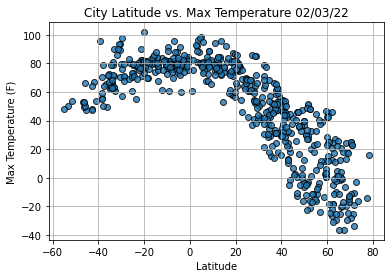

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

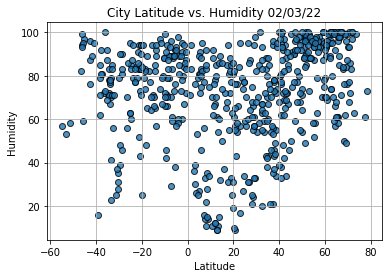

In [38]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

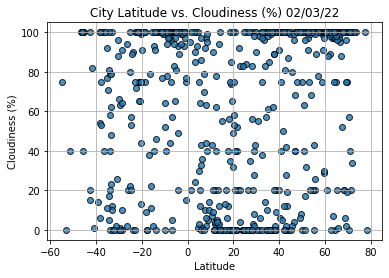

In [39]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

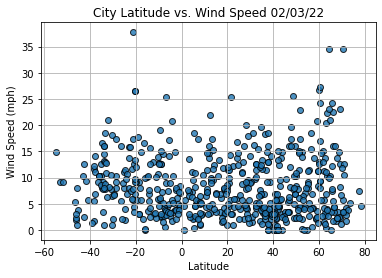

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [102]:
from scipy.stats import linregress

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(line_eq)
    print(f"p_value = " + str(p_value))
    print(f"r_value = " + str(r_value))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

y = -0.76x + 65.46
p_value = 8.895783380242482e-109
r_value = -0.7583781153458424


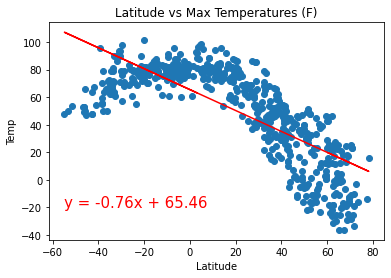

In [103]:
# Create a scatter plot of the x and y values.

plot_linear_regression(lats, max_temps, "Latitude vs Max Temperatures (F)", "Temp", (-55,-20))

In [104]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

y = -1.47x + 95.89
p_value = 7.382337095517308e-119
r_value = -0.8639672143330386


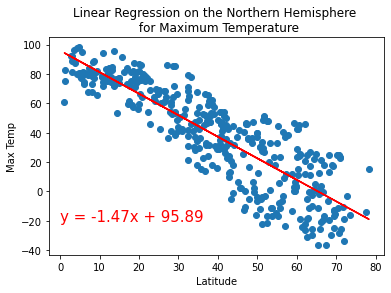

In [105]:
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Max Temp"], 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       "Max Temp", (0,-20))

y = 0.47x + 84.62
p_value = 4.6108585962830674e-18
r_value = 0.5845049165690651


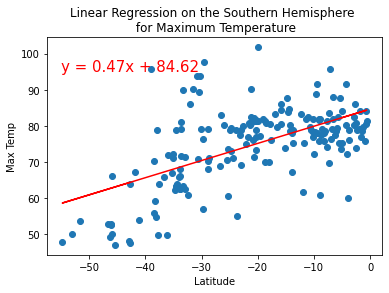

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp',(-55,95))

y = 0.55x + 50.22
p_value = 1.8965643079903328e-22
r_value = 0.4641865452753048


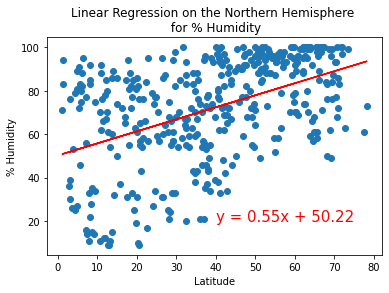

In [111]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity", '% Humidity',(40,20))

y = 0.17x + 79.09
p_value = 0.08797814022220506
r_value = 0.12683167099043552


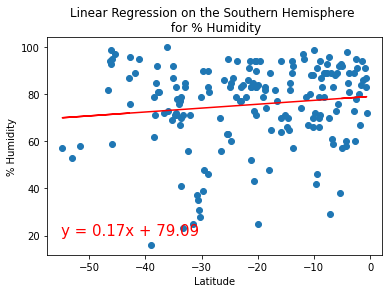

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", '% Humidity',(-55,20))

y = 0.75x + 29.75
p_value = 2.64693067463363e-13
r_value = 0.3572450697710966


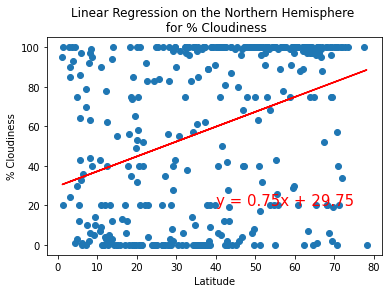

In [113]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness", '% Cloudiness',(40,20))

y = 0.81x + 84.6
p_value = 5.106033512458034e-05
r_value = 0.295559897173752


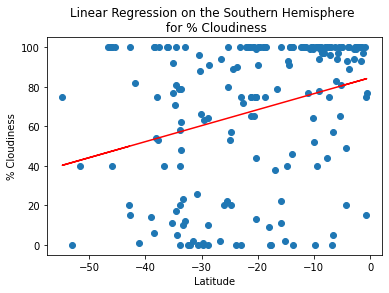

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness", '% Cloudiness',(40,20))

y = 0.03x + 6.65
p_value = 0.041458205914661615
r_value = 0.10277360455185476


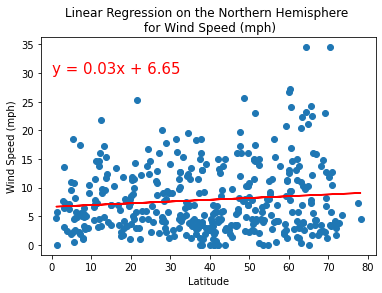

In [122]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)", 'Wind Speed (mph)',(0,30))

y = -0.04x + 7.76
p_value = 0.1738030180149108
r_value = -0.10125454769044417


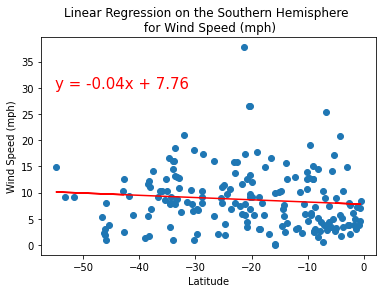

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)", 'Wind Speed (mph)',(-55,30))